In [7]:
import utils
from darts import TimeSeries
import numpy as np
import pandas as pd
from darts.utils import statistics
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = utils.load_data()
ts, covars_diff, covars_nodiff = utils.df2ts(df)

# Plot raw values

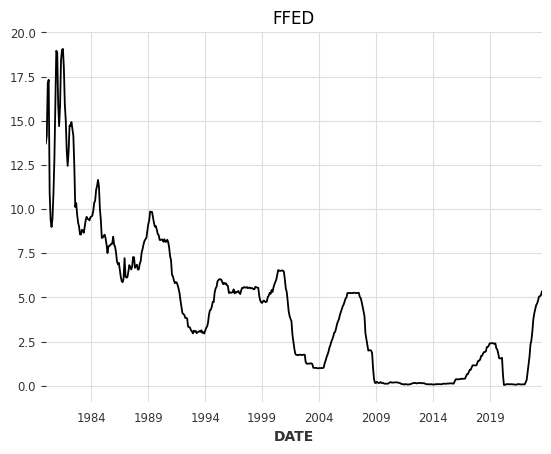

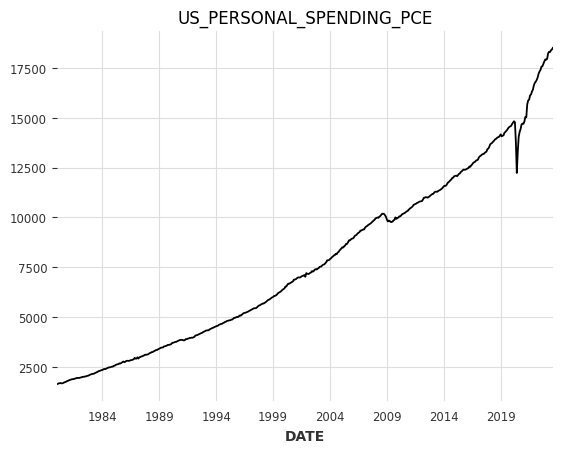

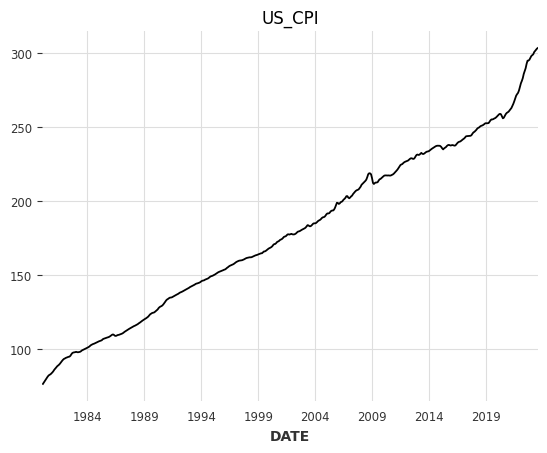

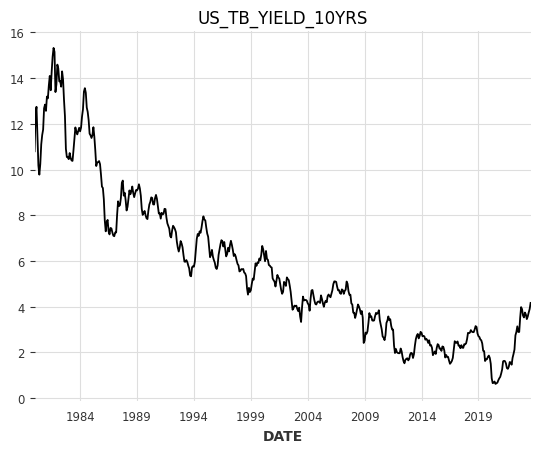

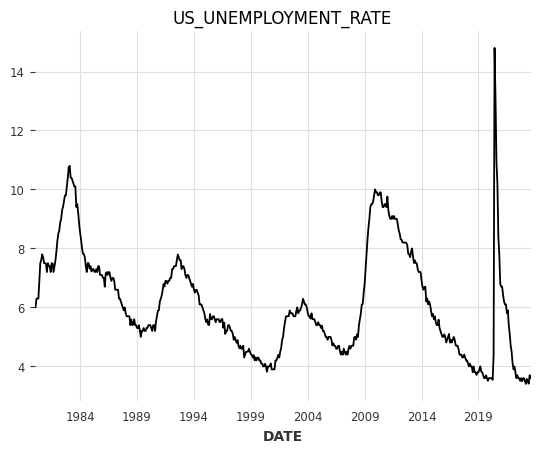

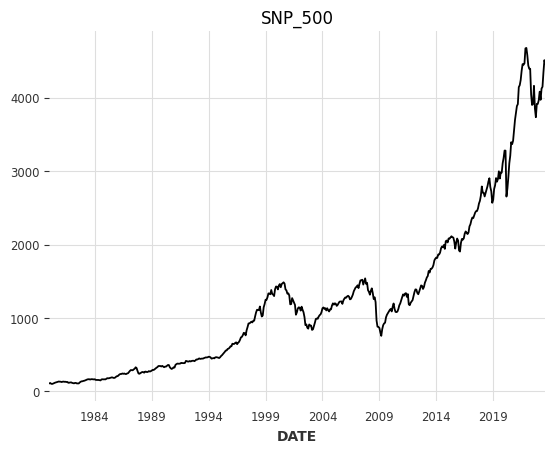

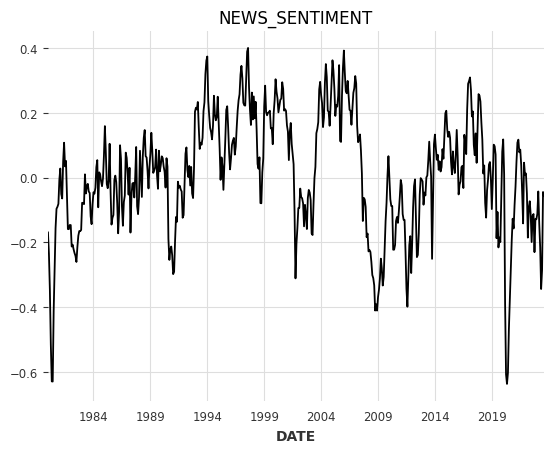

In [10]:
for col in df.columns:
    df[col].plot(title=col)
    plt.show()

# Correlation

In [9]:
covars_diff_pipeline, covars_diff_scaled = utils.scale_ts(covars_diff, should_diff=True)
covars_nodiff_pipeline, covars_nodiff_scaled = utils.scale_ts(
    covars_nodiff, should_diff=False
)
pipeline, ts_scaled = utils.scale_ts(ts, should_diff=True)

train_ts_scaled, val_ts_scaled = ts_scaled.split_after(pd.Timestamp("2016-01-01"))

covariates_scaled = covars_diff_scaled.stack(covars_nodiff_scaled)
train_covariates_scaled, val_covariates_scaled = covariates_scaled.split_after(
    pd.Timestamp("2016-01-01")
)

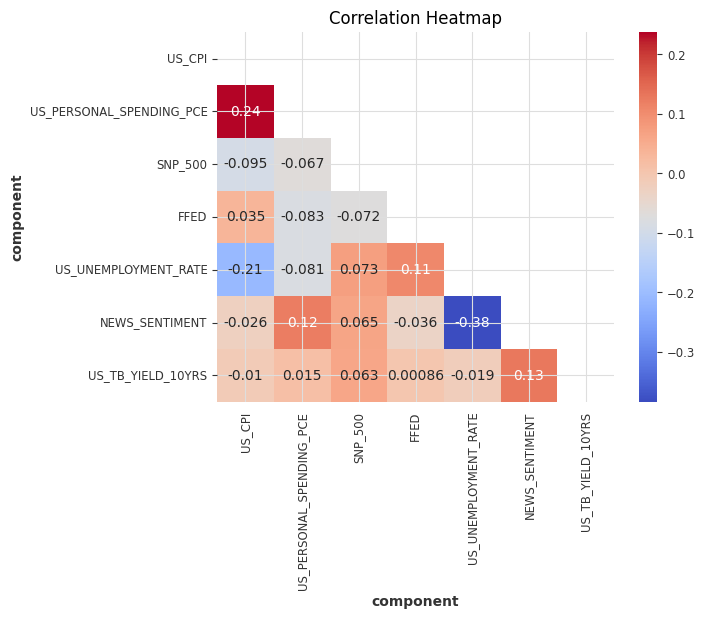

In [11]:
covariates_scaled = covariates_scaled.stack(ts_scaled)
df = covariates_scaled.pd_dataframe()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Plot the heatmap with the mask
sns.heatmap(df.corr(), mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

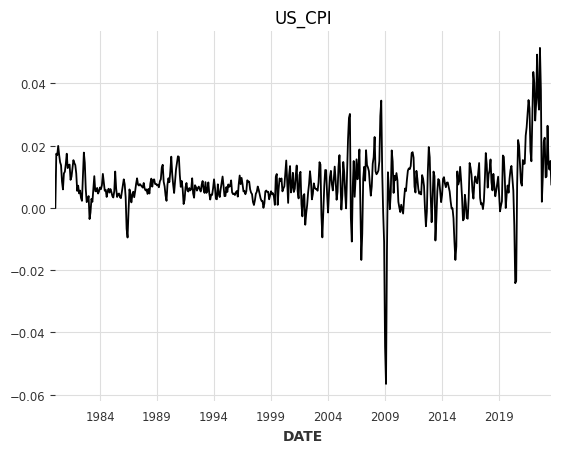

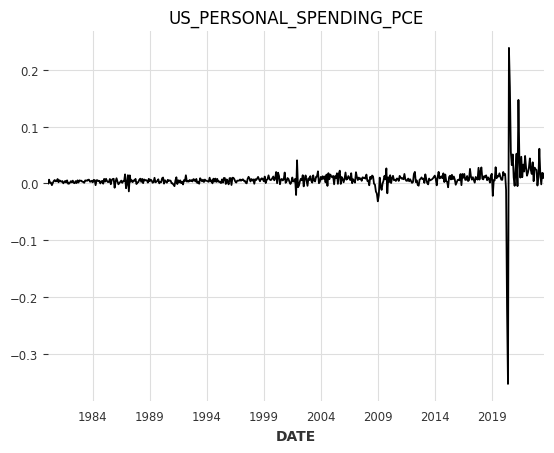

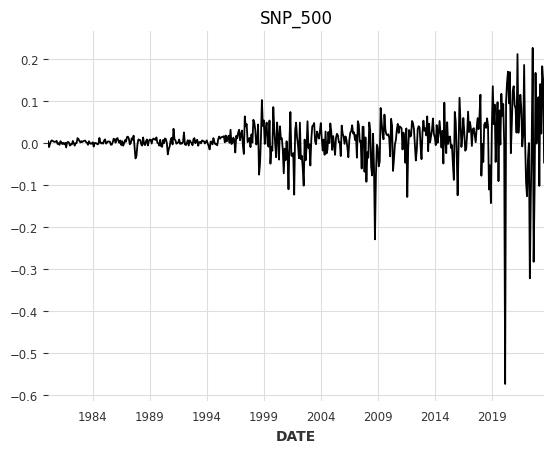

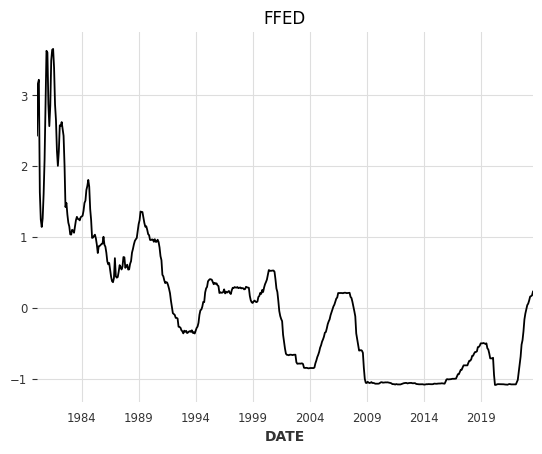

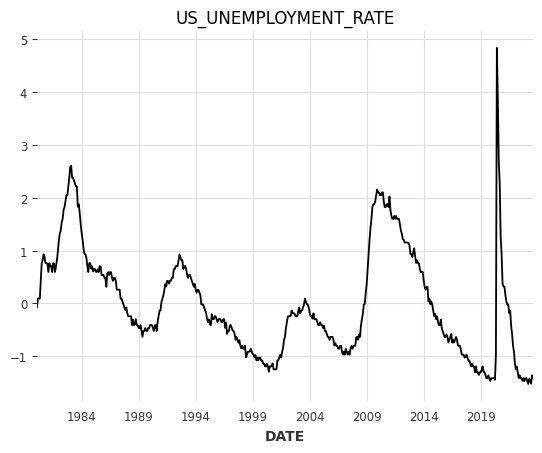

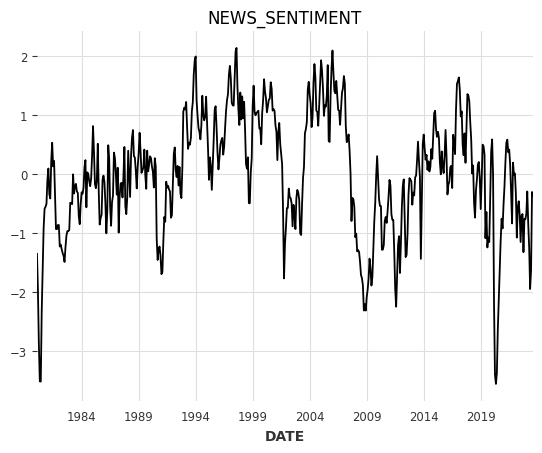

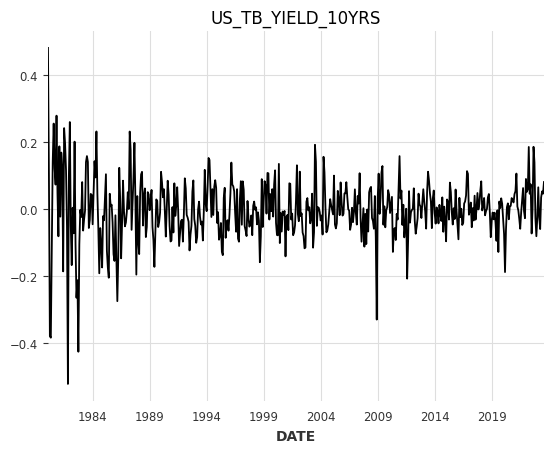

In [12]:
for col in df.columns:
    df[col].plot(title=col)
    plt.show()

----------
# Brouillon

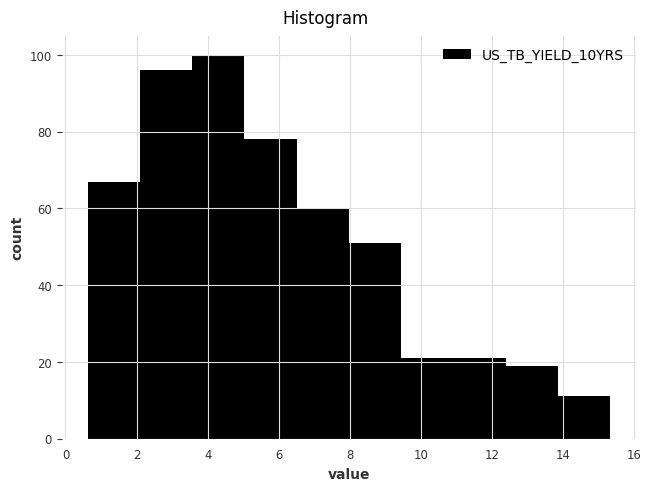

In [ ]:
ts = TimeSeries.from_dataframe(df,value_cols= ['US_TB_YIELD_10YRS'])

statistics.plot_hist(ts)

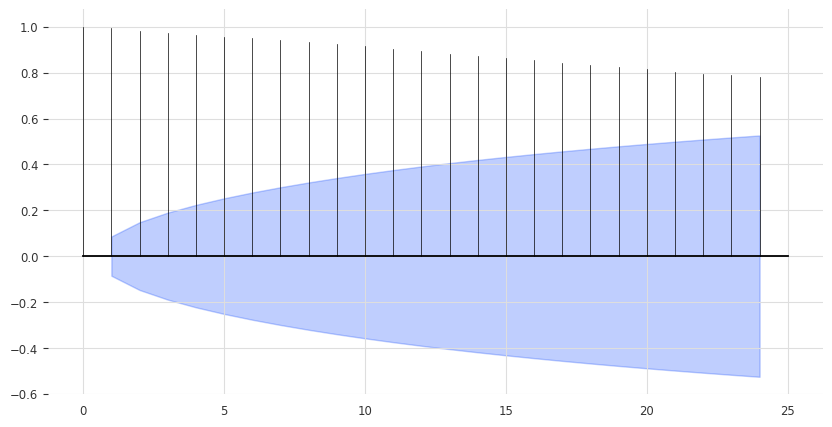

In [14]:
statistics.plot_acf(ts)

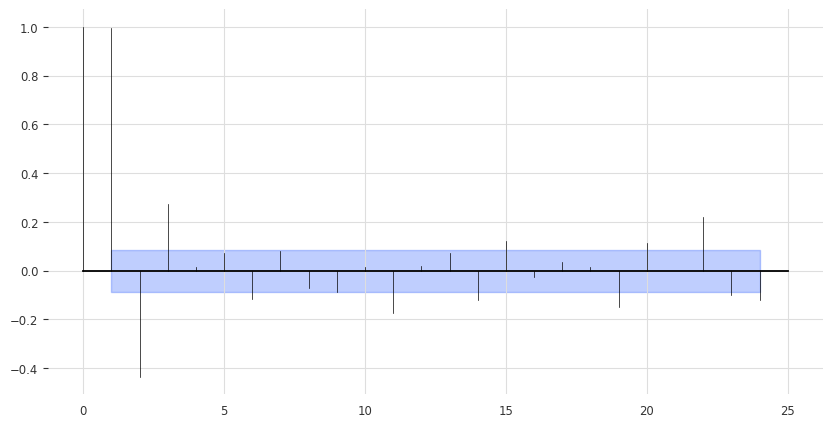

In [12]:
statistics.plot_pacf(ts)

In [15]:
statistics.extract_trend_and_seasonality(ts)

(<TimeSeries (DataArray) (DATE: 524, component: 1, sample: 1)> Size: 4kB
 array([[[ 9.81347953]],
 
        [[10.05757959]],
 
        [[10.30167966]],
 
        [[10.54577972]],
 
        [[10.78987978]],
 
        [[11.03397985]],
 
        [[11.53503561]],
 
        [[11.6411192 ]],
 
        [[11.68889292]],
 
        [[11.7961034 ]],
 
 ...
 
        [[ 3.46534577]],
 
        [[ 3.51869173]],
 
        [[ 3.58570264]],
 
        [[ 3.6804318 ]],
 
        [[ 4.02027887]],
 
        [[ 4.1571367 ]],
 
        [[ 4.29399454]],
 
        [[ 4.43085238]],
 
        [[ 4.56771021]],
 
        [[ 4.70456805]]])
 Coordinates:
   * DATE       (DATE) datetime64[ns] 4kB 1980-01-31 1980-02-29 ... 2023-08-31
   * component  (component) <U1 4B '0'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None,
 <TimeSeries (DataArray) (DATE: 524, component: 1, sample: 1)> Size: 4kB
 array([[[0.99832252]],
 
        [[1.00735844]],
 
        [[